<a href="https://colab.research.google.com/github/tutalae/Scikit-learn-practice/blob/main/Scikit_learn_practice2_Regression_bigMc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')


pandas version: 1.1.5
numpy version: 1.19.5
seaborn version: 0.11.1


In [5]:
url= "https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv"
df = pd.read_csv(url, parse_dates = ["date"])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           1730 non-null   object        
 1   iso_a3         1730 non-null   object        
 2   currency_code  1730 non-null   object        
 3   local_price    1730 non-null   float64       
 4   dollar_ex      1730 non-null   float64       
 5   GDP_dollar     1117 non-null   float64       
 6   date           1730 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 94.7+ KB


In [7]:
df2 = df.copy()
df2.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [8]:
df = df[(df["date"].dt.year==2019)& (df["date"].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.41927,-0.43420,-0.33846,-0.26107,-0.39584
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.19215,-0.21292,-0.07974,0.02791,-0.15955
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.40586,0.36972,0.60148,0.78883,0.46259
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.12215,-0.14472,0.00000,0.11698,-0.08673
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.04012,0.01338,0.18485,0.32346,0.08209


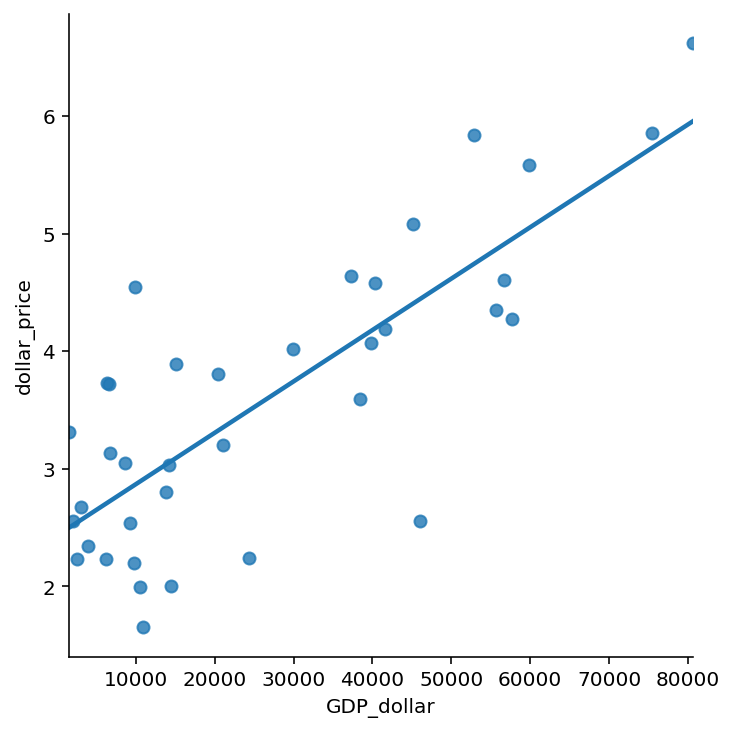

In [9]:
sns.lmplot(x = "GDP_dollar", y = "dollar_price", data = df, ci = None) 
#ci = confident interval

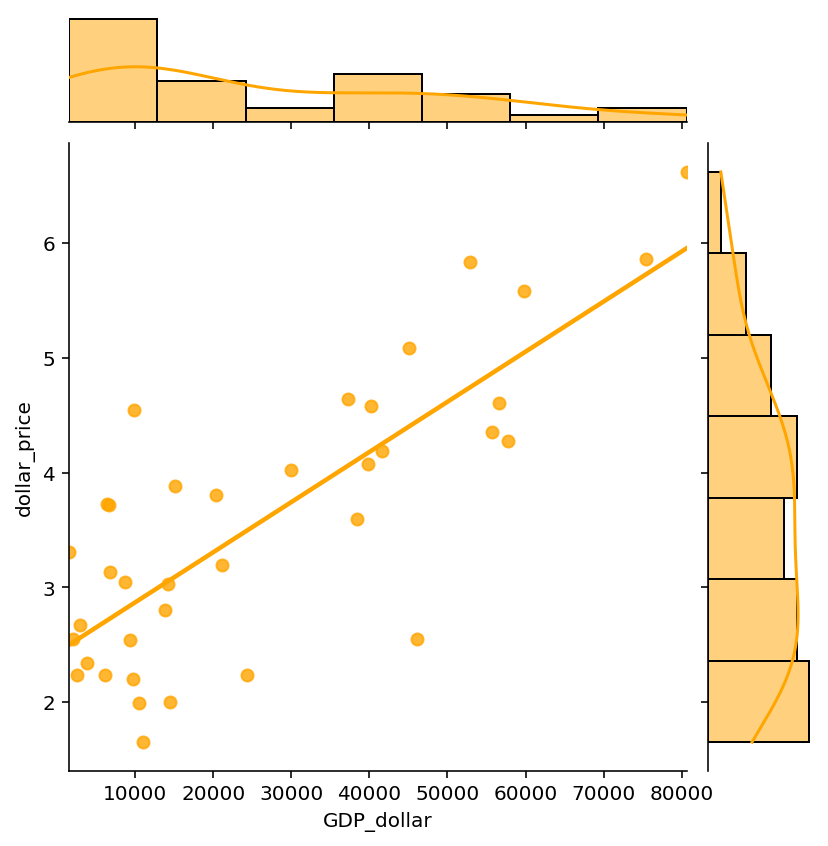

In [10]:
sns.jointplot(x= "GDP_dollar", y = "dollar_price", data = df, kind ="reg", ci = None,
              color = "orange");

# sklearn: LinearRegression

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression


In [12]:
print(f'sklearn version : {sklearn.__version__}')

sklearn version : 0.22.2.post1


In [14]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.fit(df[["GDP_dollar"]], df["dollar_price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X = df[["GDP_dollar"]] # expect 2D array not Series (1D)
y = df.dollar_price

In [20]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.score(X, y) # R-squared

0.6312750690042251

In [23]:
model.intercept_

2.432727161471293

In [24]:
model.coef_

array([4.36961383e-05])

# *Predict*

y = mx +c

In [25]:
model.intercept_ + model.coef_* 9000

array([2.82599241])

In [29]:
model.predict([[9000]]) # 2D array

array([2.82599241])

In [27]:
model.predict([[9000],[40000]])

array([2.82599241, 4.18057269])

In [31]:
np.arange(5000, 50000, 2500) # create  NP arange

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500])

In [33]:
np.arange(5000, 50000, 2500).reshape(-1, 1) # create  NP arange 2D

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500]])

In [34]:
model.predict(np.arange(5000, 50000, 2500).reshape(-1, 1) )

array([2.65120785, 2.7604482 , 2.86968854, 2.97892889, 3.08816924,
       3.19740958, 3.30664993, 3.41589027, 3.52513062, 3.63437096,
       3.74361131, 3.85285166, 3.962092  , 4.07133235, 4.18057269,
       4.28981304, 4.39905338, 4.50829373])

In [35]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

# Main data in panda

In [36]:
s = pd.Series(np.linspace(5000, 50000, 20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [39]:
model.predict(s.to_frame()) # chage Series to DataFrame

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [41]:
dx = pd.DataFrame(np.linspace(5000, 50000, 20), columns= ["gdp"])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [42]:
model.predict(dx)

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

# Statmodels : Linear Regression

In [43]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [44]:
# formula : response ~ predict + predictor
model_a = smf.ols(formula= "dollar_price ~ GDP_dollar", data = df).fit()

In [45]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           4.34e-09
Time:                        14:11:26   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [46]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

In [47]:
model.intercept_ # sklearn

2.432727161471293

In [48]:
model.coef_

array([4.36961383e-05])

In [49]:
print(f'{model.coef_[0]:.7f}')

0.0000437
